In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib.ticker import FuncFormatter

import geopandas as gpd

In [2]:
ox_data_url = r'https://ocgptweb.azurewebsites.net/CSVDownload'
df = pd.read_csv(ox_data_url, parse_dates=['Date'], dayfirst=False)
df = df.loc[df['Date'] <= datetime(2020, 4, 13), :]
df.head()

,CountryName,CountryCode,Date,S1_School closing,S1_IsGeneral,S1_Notes,S2_Workplace closing,S2_IsGeneral,S2_Notes,S3_Cancel public events,...,S11_Notes,S12_Testing framework,S12_Notes,S13_Contact tracing,S13_Notes,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39
0,Aruba,ABW,2020-01-01,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t
1,Aruba,ABW,2020-01-02,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t
2,Aruba,ABW,2020-01-03,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t
3,Aruba,ABW,2020-01-04,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t
4,Aruba,ABW,2020-01-05,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t


In [3]:
def nuss_style_fun(fig, ax, title, author_line=True):
    
    #remove top and right frame parts
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # set left and bottom axis to grey
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    
    # set ticks to grey
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')
    
    #set labels to grey
    ax.yaxis.label.set_color('grey')
    ax.xaxis.label.set_color('grey') 
    
    # align axis labels with axis ends
    ax.set_xlabel(xlabel=None,
                  position=[0, 0],
                  horizontalalignment='left',
                  color='grey',
                  size=14)
    ax.set_ylabel(ylabel=None,
                  position=[0, 1],
                  horizontalalignment='right',
                  color='grey',
                  size=14)
    
    #align title
    ax.set_title(label=title,
                 loc='left',
                 color=(0.41, 0.41, 0.41),
                 size=20)
    
    #author line
    if author_line:
        fig.text(0.99, 0.01, '@rikunert', color='lightgrey', style='italic',
             horizontalalignment='right')
    
    return fig, ax

In [4]:
def draw_cases(x, y, color, title, label=None, xlabel='Date', ylabel='Cases', text1_y=12, text2_y=12, drawstyle='default'):
    
    fig, ax = plt.subplots(figsize=[10.67, 5.33])
    sns.lineplot(x=x,
                 y=y,
                 marker='o',
                 linewidth=1,
                 color=color,
                 drawstyle=drawstyle,
                 label=label,
                 ax=ax)
    fig, ax = nuss_style_fun(fig, ax, title=title)
    ax.set(xlabel='Date',
           ylabel=ylabel)
    ax.xaxis.set_ticks(np.arange(start=x.min(), 
                                 stop=max(x.max(), datetime.strptime('2020-04-19', '%Y-%m-%d')), 
                                 step=timedelta(days=14)))

    if True:
        ax.text(x='2020-03-16',
            y=text1_y,
            s='Soft lockdown',
            horizontalalignment='right',
            verticalalignment='top',
            rotation='vertical',
            color='orange',
            size=14)
        ax.axvline('2020-03-16', linestyle='--', color='orange', linewidth=1)

        ax.text(x='2020-04-19',
            y=text2_y,
            s='Lockdown eased?',
            horizontalalignment='right',
            verticalalignment='top',
            rotation='vertical',
            color='orange',
            size=14)
        ax.axvline('2020-04-19', linestyle='--', color='orange', linewidth=1)
    
    return fig, ax

In [5]:
df.columns

Index(['CountryName', 'CountryCode', 'Date', 'S1_School closing',
       'S1_IsGeneral', 'S1_Notes', 'S2_Workplace closing', 'S2_IsGeneral',
       'S2_Notes', 'S3_Cancel public events', 'S3_IsGeneral', 'S3_Notes',
       'S4_Close public transport', 'S4_IsGeneral', 'S4_Notes',
       'S5_Public information campaigns', 'S5_IsGeneral', 'S5_Notes',
       'S6_Restrictions on internal movement', 'S6_IsGeneral', 'S6_Notes',
       'S7_International travel controls', 'S7_Notes', 'S8_Fiscal measures',
       'S8_Notes', 'S9_Monetary measures', 'S9_Notes',
       'S10_Emergency investment in health care', 'S10_Notes',
       'S11_Investment in Vaccines', 'S11_Notes', 'S12_Testing framework',
       'S12_Notes', 'S13_Contact tracing', 'S13_Notes', 'ConfirmedCases',
       'ConfirmedDeaths', 'StringencyIndex', 'StringencyIndexForDisplay',
       'Unnamed: 39'],
      dtype='object')

In [6]:
df['CountryName'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Australia', 'Austria',
       'Burundi', 'Belgium', 'Burkina Faso', 'Bangladesh', 'Bulgaria',
       'Bahrain', 'Bosnia and Herzegovina', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Botswana', 'Canada',
       'Switzerland', 'Chile', 'China', 'Cameroon',
       'Democratic Republic of Congo', 'Colombia', 'Costa Rica', 'Cuba',
       'Czech Republic', 'Germany', 'Djibouti', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Spain',
       'Estonia', 'Finland', 'France', 'United Kingdom', 'Ghana',
       'Gambia', 'Greece', 'Guatemala', 'Guam', 'Guyana', 'Hong Kong',
       'Honduras', 'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland',
       'Iran', 'Iraq', 'Iceland', 'Israel', 'Italy', 'Jordan', 'Japan',
       'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'South Korea', 'Kuwait',
       'Laos', 'Lebanon', 'Sri Lanka', 'Lesotho', '

In [11]:
country_of_interest = 'Germany'
# country_of_interest =  'United_Kingdom'
# country_of_interest = 'United_States_of_America'
# country_of_interest = 'Sweden'

minimal_number_of_cases = 10
mask_country = df['CountryName'] == country_of_interest
mask_dates = df.index >= df[mask_country].index[df.loc[mask_country, 'ConfirmedCases'] >= minimal_number_of_cases].min()
mask = mask_country & mask_dates
df.loc[mask, :].head(50)

,CountryName,CountryCode,Date,S1_School closing,S1_IsGeneral,S1_Notes,S2_Workplace closing,S2_IsGeneral,S2_Notes,S3_Cancel public events,...,S11_Notes,S12_Testing framework,S12_Notes,S13_Contact tracing,S13_Notes,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39
3499,Germany,DEU,2020-02-04,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,1.0,NaN,2.0,NaN,11.0,0.0,0.00,0.00,\t
3500,Germany,DEU,2020-02-05,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,1.0,NaN,2.0,NaN,11.0,0.0,0.00,0.00,\t
3501,Germany,DEU,2020-02-06,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,CEPI (Coalition for Epidemic Preparedness Inno...,1.0,NaN,2.0,NaN,11.0,0.0,0.00,0.00,\t
3502,Germany,DEU,2020-02-07,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,1.0,NaN,2.0,NaN,12.0,0.0,0.00,0.00,\t
3503,Germany,DEU,2020-02-08,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,1.0,NaN,2.0,NaN,13.0,0.0,0.00,0.00,\t
3504,Germany,DEU,2020-02-09,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,1.0,NaN,2.0,NaN,13.0,0.0,0.00,0.00,\t
3505,Germany,DEU,2020-02-10,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,1.0,NaN,2.0,NaN,13.0,0.0,0.00,0.00,\t
3506,Germany,DEU,2020-02-11,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,1.0,NaN,2.0,NaN,13.0,0.0,0.00,0.00,\t
3507,Germany,DEU,2020-02-12,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,1.0,NaN,2.0,NaN,15.0,0.0,0.00,0.00,\t
3508,Germany,DEU,2020-02-13,0.0,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,1.0,NaN,2.0,NaN,15.0,0.0,0.00,0.00,\t


In [24]:
df.loc[3544, :]

CountryName                                                                          Germany
CountryCode                                                                              DEU
Date                                                                     2020-03-20 00:00:00
S1_School closing                                                                          2
S1_IsGeneral                                                                               1
S1_Notes                                   'Schools in Germany were closed on Monday (16 ...
S2_Workplace closing                                                                       0
S2_IsGeneral                                                                             NaN
S2_Notes                                   Half of Germans work from home currently; http...
S3_Cancel public events                                                                    2
S3_IsGeneral                                                          

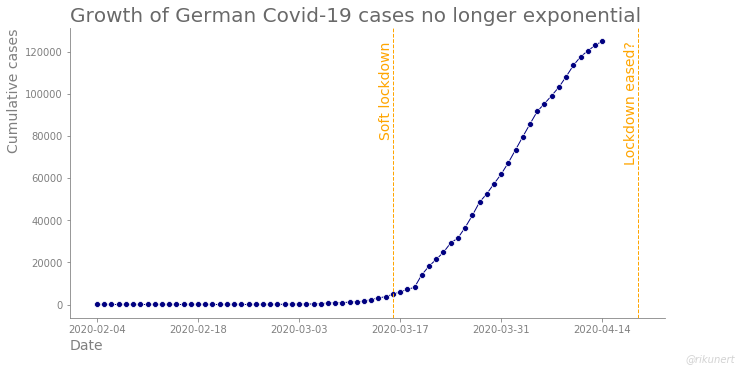

In [8]:
fig, ax = draw_cases(x=df.loc[mask, 'Date'], 
                     y=df.iloc[::-1].loc[mask, 'ConfirmedCases'], 
                     color='navy', 
                     title='Growth of German Covid-19 cases no longer exponential',
                     ylabel='Cumulative cases', 
                     text1_y=df.iloc[::-1].loc[mask, 'ConfirmedCases'].max(), 
                     text2_y=df.iloc[::-1].loc[mask, 'ConfirmedCases'].max())
fig.savefig('D_cum_cases_ox.png', dpi=250, bbox_inches='tight')

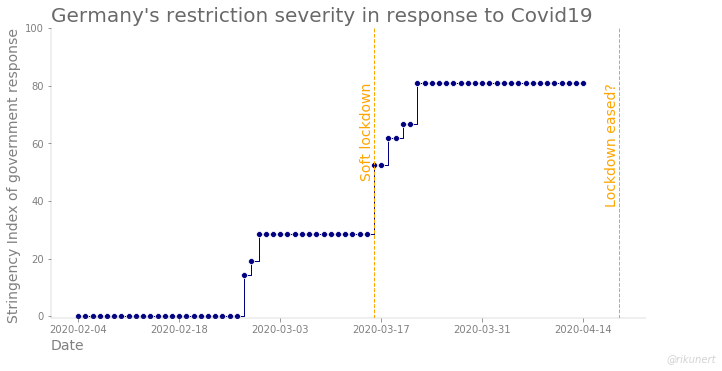

In [35]:
fig, ax = draw_cases(x=df.loc[mask, 'Date'], 
                     y=df.iloc[::-1].loc[mask, 'StringencyIndexForDisplay'], 
                     color='navy', 
                     title='Germany\'s restriction severity in response to Covid19',
                     ylabel='Stringency Index of government response', 
                     text1_y=df.iloc[::-1].loc[mask, 'StringencyIndex'].max(), 
                     text2_y=df.iloc[::-1].loc[mask, 'StringencyIndex'].max(),
                    drawstyle='steps-post')
ax.set(ylim=[-0.5, 100])
fig.savefig('D_restriction_severity.png', dpi=250, bbox_inches='tight')

In [28]:
world = gpd.read_file('C:\\Users\\Richard\Desktop\\python\\corona\\ne_10m_admin_0_countries\\ne_10m_admin_0_countries.shp')

In [29]:
world.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [30]:
world[world['SOVEREIGNT']=='Czechia']

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
49,Admin-0 country,0,5,Czechia,CZE,0,2,Sovereign country,Czechia,CZE,...,ì²´ì½,TsjechiÃ«,Czechy,RepÃºblica Checa,Ð§ÐµÑ Ð¸Ñ,Tjeckien,Ãek Cumhuriyeti,Cá»ng hÃ²a SÃ©c,æ·å ,"POLYGON ((14.81039270000014 50.85844716400005,..."


In [31]:
world_updated = world.merge(right=df.loc[df['Date']==df['Date'].max(), ['CountryName', 'CountryCode', 'StringencyIndexForDisplay']], 
                    how='left',
                    left_on='ADM0_A3', 
                    right_on='CountryCode',
                   suffixes=('', '')).copy()

In [32]:
params = {"text.color" : (0.41, 0.41, 0.41),
          'axes.labelcolor' : (0.41, 0.41, 0.41),
          "xtick.color" : (0.41, 0.41, 0.41),
          "ytick.color" : (0.41, 0.41, 0.41),
          'axes.edgecolor': (0.41, 0.41, 0.41),
         'axes.linewidth': 0.25}
plt.rcParams.update(params)

def visualise_europe_choropleth(world,
                                date_text,
                                author_line=True):
    
    fig, ax = plt.subplots(figsize=[10.67, 5.33])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("top", size="5%", pad=0.5)
    ax.axis('off')
    world.plot(column="StringencyIndexForDisplay", 
                edgecolor='lightgrey', 
                cmap='jet',
                linewidth=0.5,
                vmin=0,
                vmax=100,
               missing_kwds={'color': 'lightgrey'},
               legend=True,
               legend_kwds={'label': "Response stringency index",
                            'orientation': "horizontal",
                           'format': '%.0f%%',
                           'shrink': 0.5,
                           },
                ax=ax,
              cax=cax)
    
    ax.set_title('Government reaction to Covid-19\n\n',
                 color=(0.41, 0.41, 0.41),
                 size=26)
    ax.set(xlim=[-24, 50],
          ylim=[33, 70])
    
    ax.text(x=-26,
            y=43.5,
            s=date_text,
            horizontalalignment='left',
            verticalalignment='bottom',
            color=(0.41, 0.41, 0.41),
            size=24)
    
    #author line
    if author_line:
        fig.text(0.83, 0.05, '@rikunert', color='lightgrey', style='italic',
             horizontalalignment='right')
        
    fig.text(0.205, 0.05, 'Data: Oxford COVID-19 Government Response Tracker', color='lightgrey',
             horizontalalignment='left')

    return fig, ax


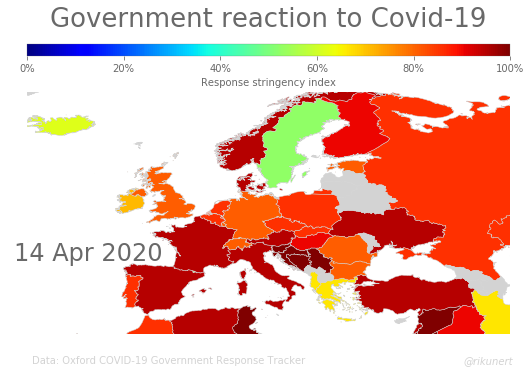

In [34]:
fig, ax = visualise_europe_choropleth(world_updated, 
                                      date_text=df['Date'].max().strftime("%d %b %Y"),
                                      author_line=True)
fig.savefig('EU_restriction_severity.png', dpi=250, bbox_inches='tight')

In [16]:
dpi_count = 100
start_date = df['Date'].min()
end_date = df['Date'].max() - timedelta(days=1)
delta = timedelta(days=1)
counter = 0
expl_i = 0
while start_date <= end_date:
    
    date_text = start_date.strftime("%d %b %Y")
    print(date_text)
    
    world_updated = world.merge(right=df.loc[df['Date']==pd.Timestamp(start_date), ['CountryName', 'CountryCode', 'StringencyIndexForDisplay']], 
                    how='left',
                    left_on='ADM0_A3', 
                    right_on='CountryCode',
                   suffixes=('', '')).copy()
    
    fig, ax = visualise_europe_choropleth(world_updated, 
                                          date_text=date_text,
                                          author_line=True)
    
    if start_date == df['Date'].min():
        frames_per_date = 10
    else:
        frames_per_date = 3
    
    for i in range(frames_per_date):  # number of frames
        fig.savefig('severity_gif//EU_severity_{:03d}.png'.format(counter+i), dpi=dpi_count, bbox_inches='tight')
    plt.close(fig)
    
    start_date += delta
    counter += frames_per_date

for i in range(20):  # number of end frames
    fig.savefig('severity_gif//EU_severity_{:03d}.png'.format(counter+i), dpi=dpi_count, bbox_inches='tight')